In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, minmax_scale
from sklearn.model_selection import train_test_split

#scikit-learn
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('housing_prices_dataset.csv')

# Exploratory Data Analysis (EDA)

In [4]:
data[:5]

,Size,Bedrooms,Bathrooms,Neighborhood,YearBuilt,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price
0,10000.000000,NaN,NaN,Commercial,1973,NaN,Medium,30.000000,5.488515,1.488980e+06
1,1930.867849,4.0,3.0,Industrial,1928,0.0,Medium,1.802602,7.003753,6.383428e+05
2,2323.844269,5.0,1.0,Commercial,2009,0.0,Medium,7.573310,3.090808,5.858642e+05
3,2761.514928,4.0,2.0,Industrial,1962,1.0,Low,2.761676,5.355583,7.148188e+05
4,1882.923313,3.0,2.0,Suburb,2001,0.0,Medium,5.537443,3.721960,5.637058e+05


In [5]:
data.dtypes

Size                     float64
Bedrooms                 float64
Bathrooms                float64
Neighborhood              object
YearBuilt                  int64
HasGarage                float64
LuxuryRating              object
ProximityToCityCenter    float64
Condition                float64
Price                    float64
dtype: object

In [6]:
data.shape

(5000, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Size                   5000 non-null   float64
 1   Bedrooms               4500 non-null   float64
 2   Bathrooms              4666 non-null   float64
 3   Neighborhood           5000 non-null   object 
 4   YearBuilt              5000 non-null   int64  
 5   HasGarage              4750 non-null   float64
 6   LuxuryRating           5000 non-null   object 
 7   ProximityToCityCenter  5000 non-null   float64
 8   Condition              5000 non-null   float64
 9   Price                  5000 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 390.8+ KB


In [8]:
data.describe()

,Size,Bedrooms,Bathrooms,YearBuilt,HasGarage,ProximityToCityCenter,Condition,Price
count,5000.000000,4500.000000,4666.000000,5000.000000,4750.000000,5000.000000,5000.000000,5.000000e+03
mean,2163.987908,3.000889,2.011573,1959.813800,0.491789,5.249621,5.019177,6.032616e+05
std,1223.447638,1.428911,0.809029,35.331952,0.499985,3.185696,1.981795,1.761719e+05
min,379.366330,1.000000,1.000000,1900.000000,0.000000,-1.883158,-3.372295,2.570866e+05
25%,1678.028844,2.000000,1.000000,1929.000000,0.000000,3.599235,3.670990,5.227377e+05
50%,2019.060368,3.000000,2.000000,1959.500000,0.000000,5.023551,5.021152,5.843121e+05
75%,2354.863069,4.000000,3.000000,1991.000000,1.000000,6.371980,6.368168,6.482723e+05
max,10000.000000,5.000000,3.000000,2020.000000,1.000000,30.000000,11.690949,1.837662e+06


In [9]:
data.duplicated().sum()

0

In [10]:
data.isnull().sum()

Size                       0
Bedrooms                 500
Bathrooms                334
Neighborhood               0
YearBuilt                  0
HasGarage                250
LuxuryRating               0
ProximityToCityCenter      0
Condition                  0
Price                      0
dtype: int64

In [11]:
num_col = data.select_dtypes(include= 'number').columns

In [12]:
num_col

Index(['Size', 'Bedrooms', 'Bathrooms', 'YearBuilt', 'HasGarage',
       'ProximityToCityCenter', 'Condition', 'Price'],
      dtype='object')

Size


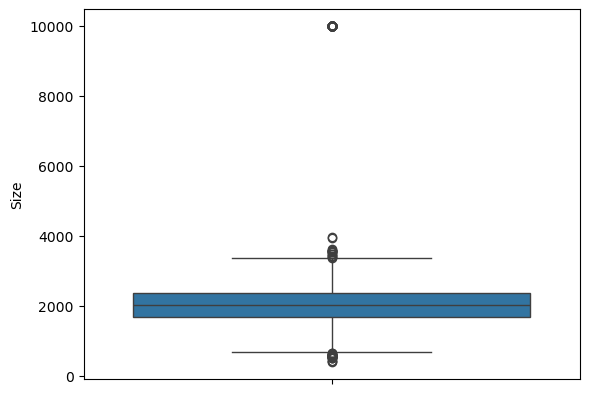

Bedrooms


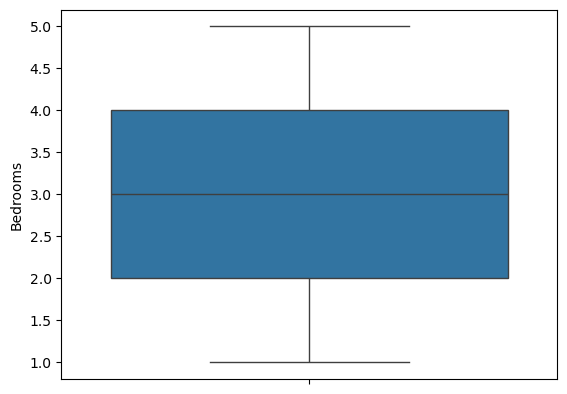

Bathrooms


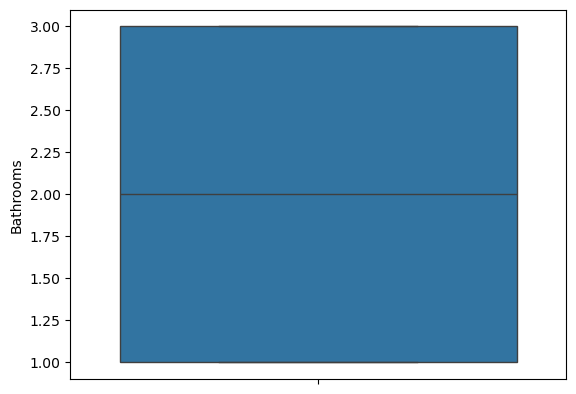

YearBuilt


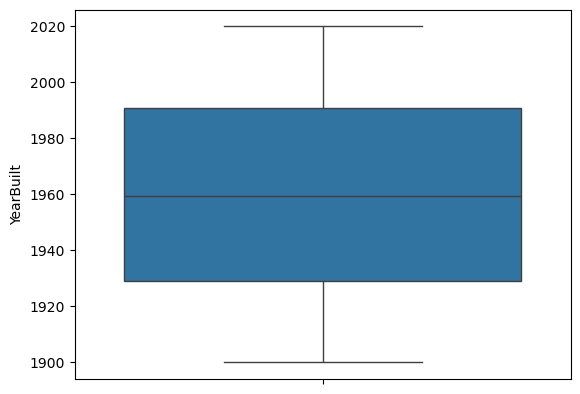

HasGarage


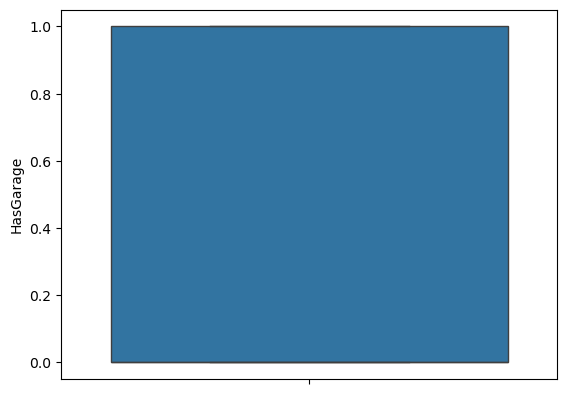

ProximityToCityCenter


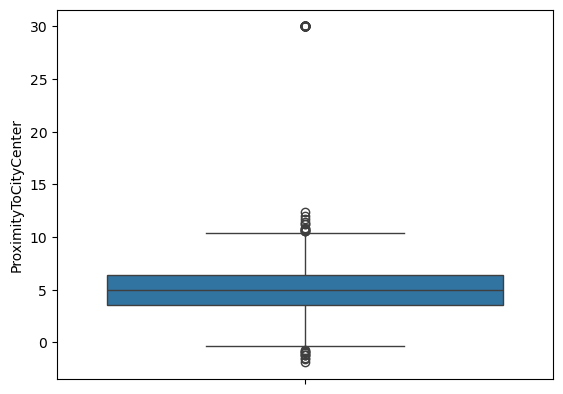

Condition


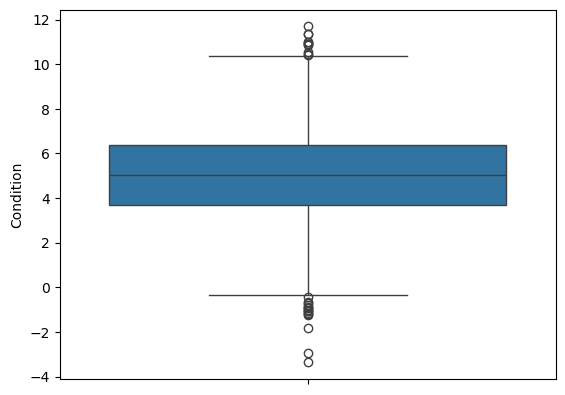

Price


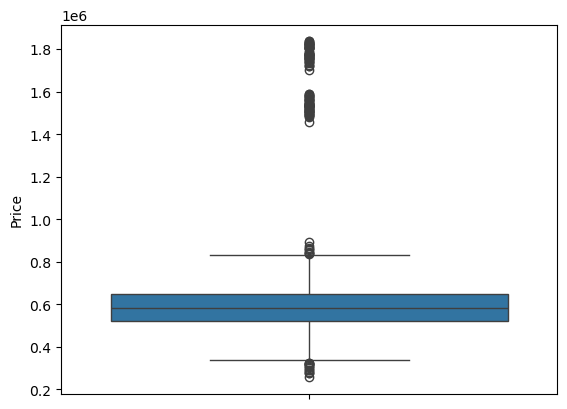

In [13]:
for col in num_col:
    print(col)
    sns.boxplot(data[col])
    plt.show()

<Axes: >

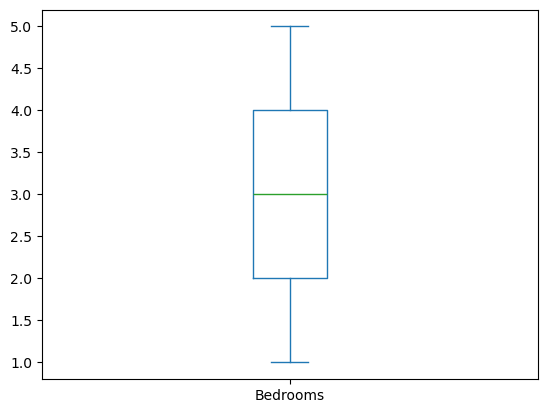

In [14]:
data['Bedrooms'].plot(kind = 'box')

In [15]:
data[num_col].corr()

,Size,Bedrooms,Bathrooms,YearBuilt,HasGarage,ProximityToCityCenter,Condition,Price
Size,1.000000,-0.002868,0.004128,-0.009397,-0.000767,0.498816,-0.000011,0.952369
Bedrooms,-0.002868,1.000000,-0.007199,0.003371,-0.009011,-0.001710,0.004088,0.392132
Bathrooms,0.004128,-0.007199,1.000000,-0.007046,0.006780,0.003935,0.000893,0.156912
YearBuilt,-0.009397,0.003371,-0.007046,1.000000,0.016489,0.006787,0.024348,0.005592
HasGarage,-0.000767,-0.009011,0.006780,0.016489,1.000000,0.019281,-0.013893,-0.005184
ProximityToCityCenter,0.498816,-0.001710,0.003935,0.006787,0.019281,1.000000,-0.014041,0.338437
Condition,-0.000011,0.004088,0.000893,0.024348,-0.013893,-0.014041,1.000000,0.005978
Price,0.952369,0.392132,0.156912,0.005592,-0.005184,0.338437,0.005978,1.000000


<Axes: >

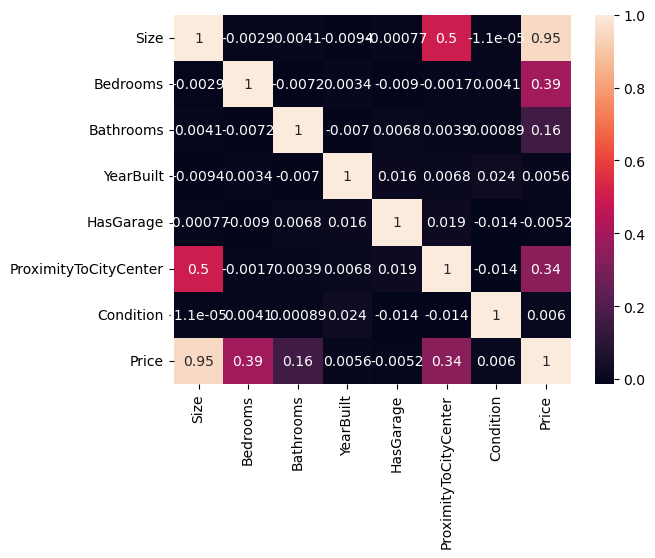

In [16]:
sns.heatmap(data[num_col].corr(), annot=True)

<Axes: >

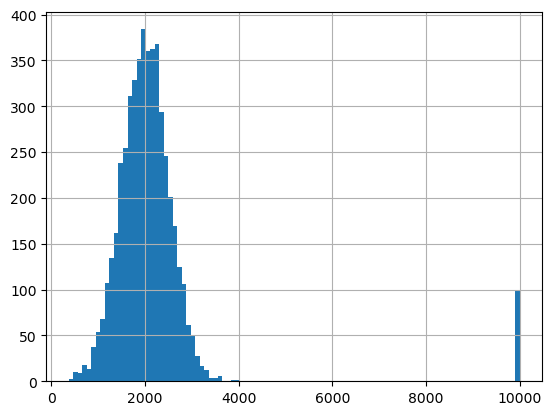

In [17]:
data['Size'].hist(bins = 100)

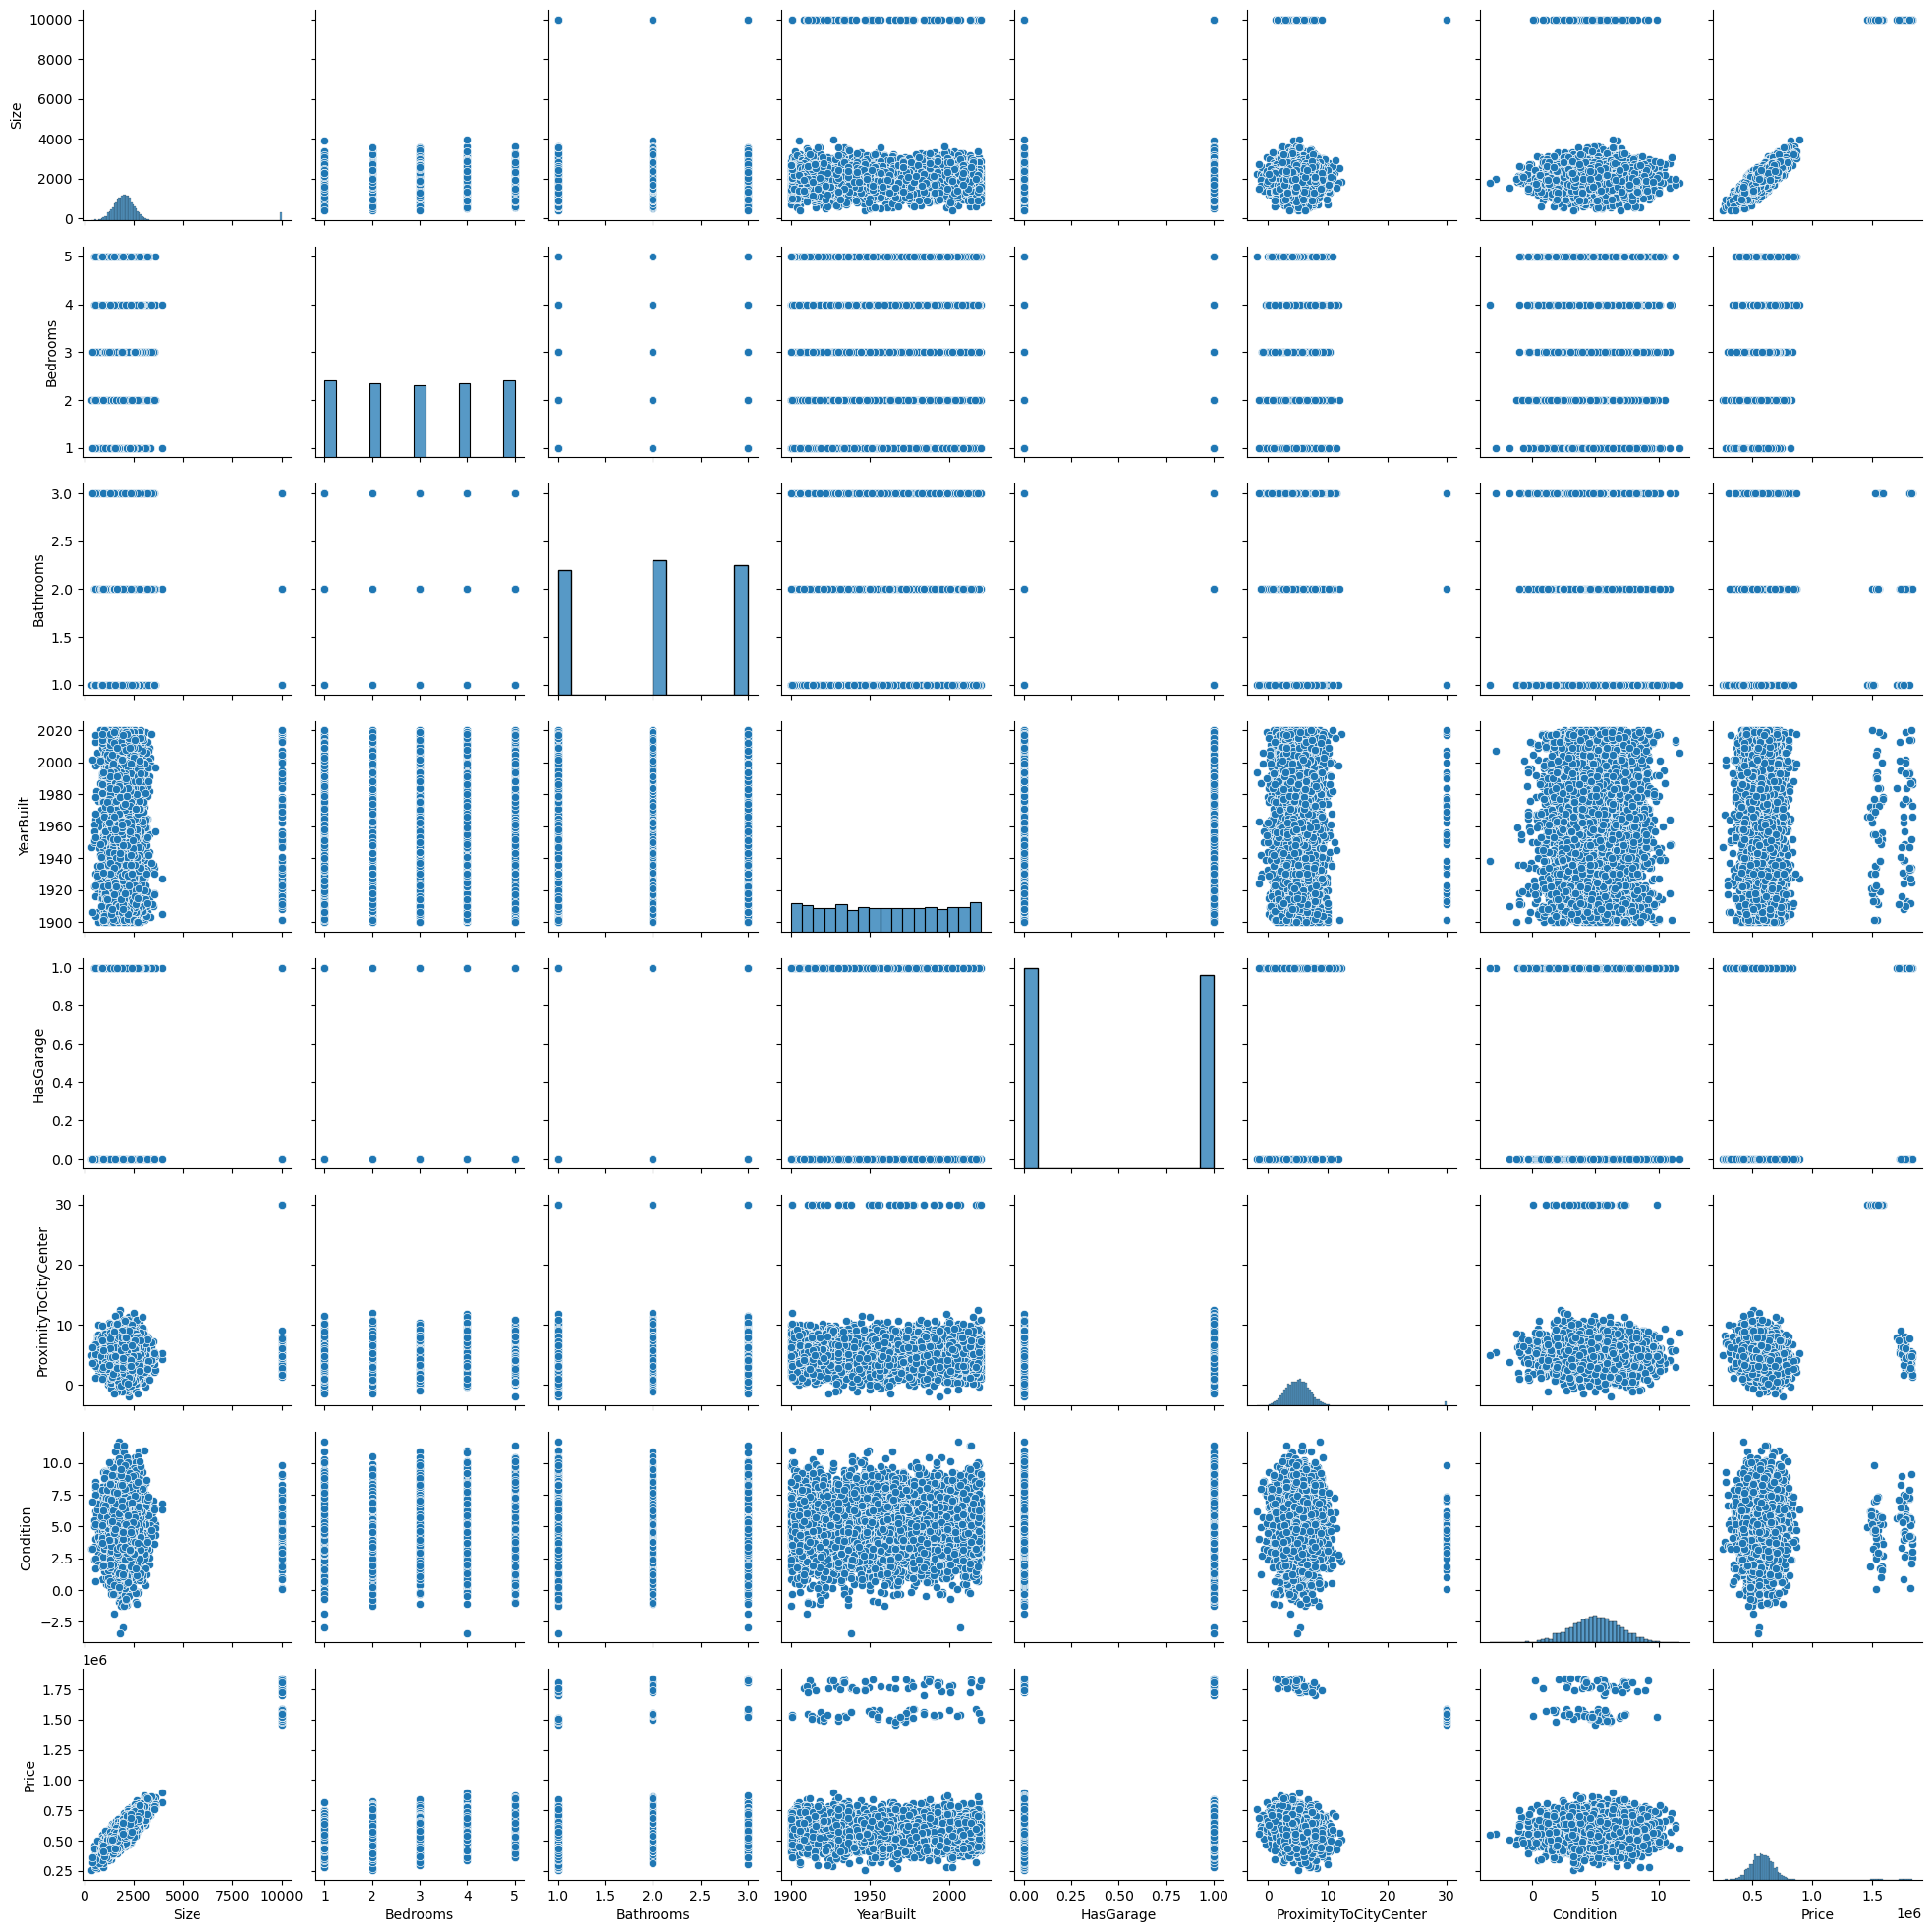

In [18]:
sns.pairplot(data[num_col])

In [19]:
data['Bedrooms'].value_counts()

Bedrooms
1.0    926
5.0    925
4.0    894
2.0    888
3.0    867
Name: count, dtype: int64

<Axes: ylabel='count'>

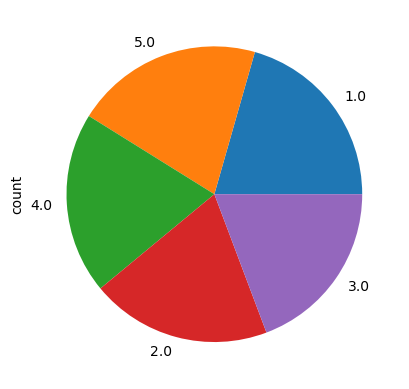

In [20]:
data['Bedrooms'].value_counts().plot(kind = 'pie')

In [21]:
data.shape

(5000, 10)

In [22]:
data.groupby(['Bedrooms']).Price.mean()

Bedrooms
1.0    530282.859433
2.0    560028.416048
3.0    578849.036774
4.0    604102.973529
5.0    633199.632498
Name: Price, dtype: float64

<Axes: xlabel='Bedrooms'>

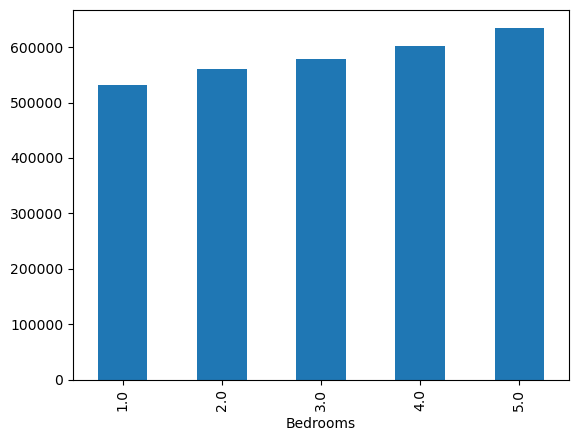

In [23]:
data.groupby(['Bedrooms']).Price.median().plot(kind = 'bar')

<Axes: xlabel='Bathrooms'>

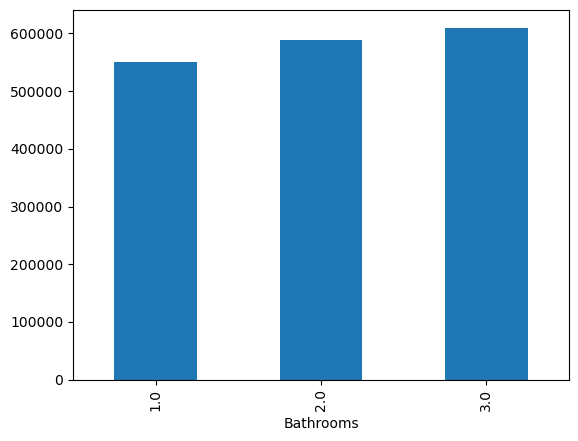

In [24]:
data.groupby(['Bathrooms']).Price.median().plot(kind = 'bar')

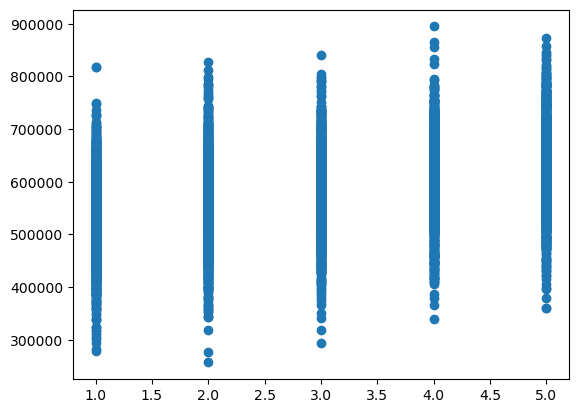

In [25]:
plt.scatter(data['Bedrooms'], data['Price'])

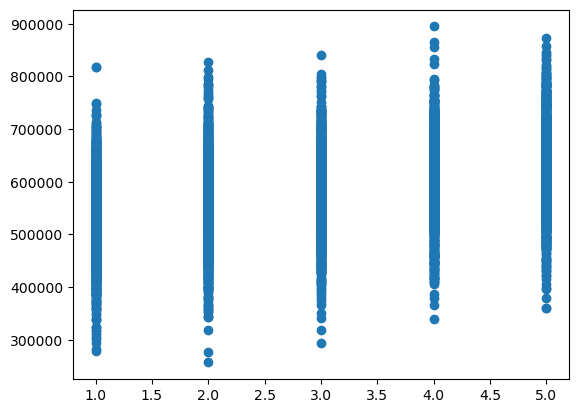

In [26]:
plt.scatter(data['Bedrooms'], data['Price'])
plt.savefig('Scatter_plot_bedroomvsprice.png')

# Pre-processing

In [28]:
data.isnull().sum()

Size                       0
Bedrooms                 500
Bathrooms                334
Neighborhood               0
YearBuilt                  0
HasGarage                250
LuxuryRating               0
ProximityToCityCenter      0
Condition                  0
Price                      0
dtype: int64

In [29]:
data['Bedrooms'].mode()[0]

1.0

In [30]:
data['Bedrooms'].mean()

3.000888888888889

In [31]:
data['HasGarage'].mode()[0]

0.0

In [32]:
data['Bedrooms'].fillna(data['Bedrooms'].mode()[0], inplace=True)

In [33]:
data['Bathrooms'].fillna(data['Bathrooms'].mode()[0], inplace=True)

In [34]:
data.fillna({'HasGarage': 0}, inplace=True)

In [35]:
# data.fillna( {'HasGarage': 0} ).isnull().sum() #,inplace=True

In [36]:
data.isnull().sum()

Size                     0
Bedrooms                 0
Bathrooms                0
Neighborhood             0
YearBuilt                0
HasGarage                0
LuxuryRating             0
ProximityToCityCenter    0
Condition                0
Price                    0
dtype: int64

In [37]:
data[data['Size']> 5000]

,Size,Bedrooms,Bathrooms,Neighborhood,YearBuilt,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price
0,10000.0,1.0,2.0,Commercial,1973,0.0,Medium,30.000000,5.488515,1.488980e+06
50,10000.0,1.0,3.0,Suburb,1994,0.0,Medium,3.739812,5.718787,1.810740e+06
100,10000.0,1.0,1.0,Downtown,1972,0.0,Low,30.000000,6.165112,1.485484e+06
150,10000.0,1.0,2.0,Rural,1984,0.0,High,4.241420,2.790789,1.788134e+06
200,10000.0,1.0,3.0,Downtown,1952,0.0,Low,30.000000,1.862397,1.579726e+06
...,...,...,...,...,...,...,...,...,...,...
4750,10000.0,1.0,3.0,Commercial,1933,1.0,Medium,4.767361,4.295493,1.809633e+06
4800,10000.0,1.0,2.0,Commercial,1969,0.0,Low,30.000000,4.749585,1.522276e+06
4850,10000.0,1.0,3.0,Rural,2020,1.0,Low,4.780006,9.161828,1.823190e+06
4900,10000.0,1.0,2.0,Industrial,1984,0.0,Low,30.000000,2.973680,1.543994e+06


In [38]:
data = data[data['Size']< 5000]

In [39]:
data.shape

(4900, 10)

In [40]:
100/5000

0.02

In [41]:
data.shape

(4900, 10)

<Axes: >

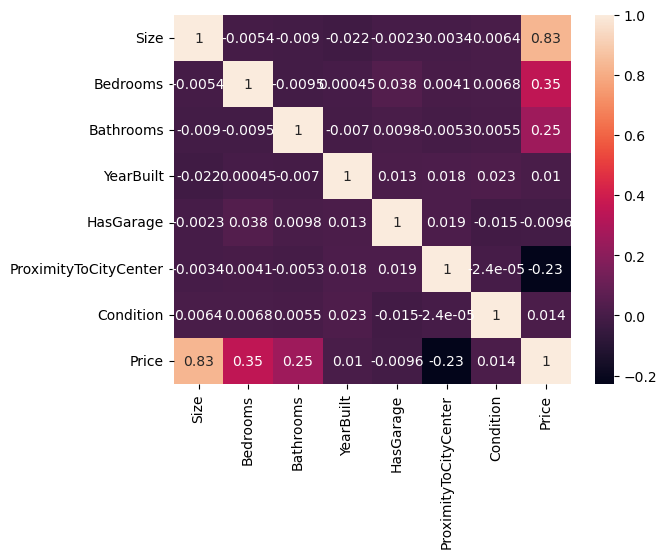

In [42]:
sns.heatmap(data[num_col].corr(), annot=True)

In [43]:
data[:5]

,Size,Bedrooms,Bathrooms,Neighborhood,YearBuilt,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price
1,1930.867849,4.0,3.0,Industrial,1928,0.0,Medium,1.802602,7.003753,638342.797067
2,2323.844269,5.0,1.0,Commercial,2009,0.0,Medium,7.573310,3.090808,585864.151414
3,2761.514928,4.0,2.0,Industrial,1962,1.0,Low,2.761676,5.355583,714818.822600
4,1882.923313,3.0,2.0,Suburb,2001,0.0,Medium,5.537443,3.721960,563705.765490
5,1882.931522,5.0,2.0,Rural,1983,1.0,Low,4.337815,3.451325,623286.052338


In [44]:
data['HouseAge'] = 2024 - data['YearBuilt']

In [45]:
data['HouseAge']

1       96
2       15
3       62
4       23
5       41
        ..
4995    76
4996    88
4997    94
4998    94
4999    66
Name: HouseAge, Length: 4900, dtype: int64

In [46]:
data[:2]

,Size,Bedrooms,Bathrooms,Neighborhood,YearBuilt,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price,HouseAge
1,1930.867849,4.0,3.0,Industrial,1928,0.0,Medium,1.802602,7.003753,638342.797067,96
2,2323.844269,5.0,1.0,Commercial,2009,0.0,Medium,7.573310,3.090808,585864.151414,15


In [47]:
data.drop(columns= 'YearBuilt', inplace=True)

In [48]:
data[:2]

,Size,Bedrooms,Bathrooms,Neighborhood,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price,HouseAge
1,1930.867849,4.0,3.0,Industrial,0.0,Medium,1.802602,7.003753,638342.797067,96
2,2323.844269,5.0,1.0,Commercial,0.0,Medium,7.573310,3.090808,585864.151414,15


In [49]:
num_col = data.select_dtypes(include= 'number').columns

<Axes: >

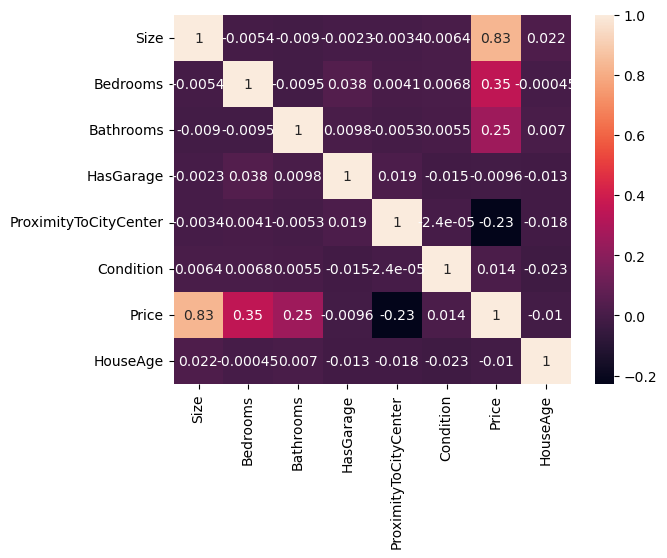

In [50]:
sns.heatmap(data[num_col].corr(), annot=True)

In [51]:
data.shape

(4900, 10)

In [52]:
# data.to_csv('housing_prices_dataset.csv')

In [53]:
# data_copy1 = data.copy()

In [54]:
data[:3]

,Size,Bedrooms,Bathrooms,Neighborhood,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price,HouseAge
1,1930.867849,4.0,3.0,Industrial,0.0,Medium,1.802602,7.003753,638342.797067,96
2,2323.844269,5.0,1.0,Commercial,0.0,Medium,7.573310,3.090808,585864.151414,15
3,2761.514928,4.0,2.0,Industrial,1.0,Low,2.761676,5.355583,714818.822600,62


In [55]:
data['LuxuryRating'].value_counts()

LuxuryRating
Medium    2498
Low       1465
High       937
Name: count, dtype: int64

In [56]:
2498/len(data) * 100, 1465/len(data) * 100, 937/len(data) * 100

(50.97959183673469, 29.897959183673468, 19.122448979591837)

In [57]:
luxury_mapping = {'Low': 1, 'Medium': 2, 'High': 3}

In [58]:
luxury_mapping

{'Low': 1, 'Medium': 2, 'High': 3}

In [59]:
data['LuxuryRating'] = data['LuxuryRating'].map(luxury_mapping)

In [60]:
data[:5]

,Size,Bedrooms,Bathrooms,Neighborhood,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price,HouseAge
1,1930.867849,4.0,3.0,Industrial,0.0,2,1.802602,7.003753,638342.797067,96
2,2323.844269,5.0,1.0,Commercial,0.0,2,7.573310,3.090808,585864.151414,15
3,2761.514928,4.0,2.0,Industrial,1.0,1,2.761676,5.355583,714818.822600,62
4,1882.923313,3.0,2.0,Suburb,0.0,2,5.537443,3.721960,563705.765490,23
5,1882.931522,5.0,2.0,Rural,1.0,1,4.337815,3.451325,623286.052338,41


In [61]:
data['Neighborhood'].value_counts()

Neighborhood
Suburb        1038
Downtown      1016
Commercial     961
Rural          954
Industrial     931
Name: count, dtype: int64

In [62]:
data = pd.get_dummies(data, columns=['Neighborhood'], dtype='int')

In [63]:
data[:4]

,Size,Bedrooms,Bathrooms,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price,HouseAge,Neighborhood_Commercial,Neighborhood_Downtown,Neighborhood_Industrial,Neighborhood_Rural,Neighborhood_Suburb
1,1930.867849,4.0,3.0,0.0,2,1.802602,7.003753,638342.797067,96,0,0,1,0,0
2,2323.844269,5.0,1.0,0.0,2,7.573310,3.090808,585864.151414,15,1,0,0,0,0
3,2761.514928,4.0,2.0,1.0,1,2.761676,5.355583,714818.822600,62,0,0,1,0,0
4,1882.923313,3.0,2.0,0.0,2,5.537443,3.721960,563705.765490,23,0,0,0,0,1


# Scaling

In [65]:
scaling = StandardScaler()

In [66]:
X = data.drop(columns='Price')

In [67]:
X.columns

Index(['Size', 'Bedrooms', 'Bathrooms', 'HasGarage', 'LuxuryRating',
       'ProximityToCityCenter', 'Condition', 'HouseAge',
       'Neighborhood_Commercial', 'Neighborhood_Downtown',
       'Neighborhood_Industrial', 'Neighborhood_Rural', 'Neighborhood_Suburb'],
      dtype='object')

In [68]:
scaled_features = X.columns

In [69]:
scaled_features

Index(['Size', 'Bedrooms', 'Bathrooms', 'HasGarage', 'LuxuryRating',
       'ProximityToCityCenter', 'Condition', 'HouseAge',
       'Neighborhood_Commercial', 'Neighborhood_Downtown',
       'Neighborhood_Industrial', 'Neighborhood_Rural', 'Neighborhood_Suburb'],
      dtype='object')

In [70]:
data[scaled_features] = scaling.fit_transform(data[scaled_features])

In [71]:
# data[:4]

<Axes: >

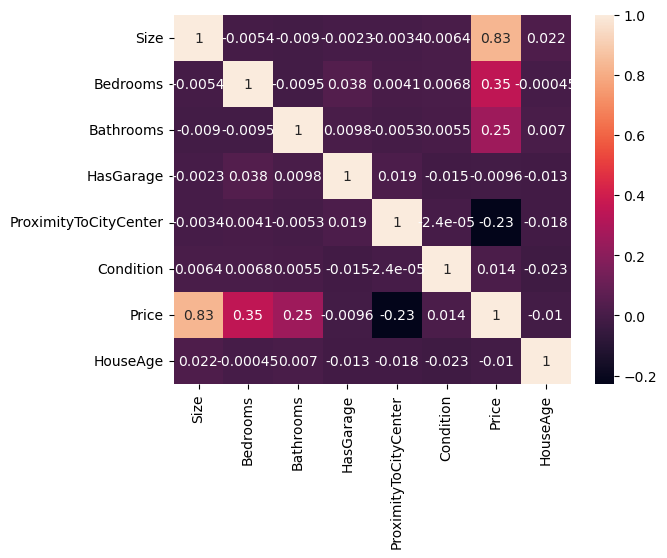

In [72]:
sns.heatmap(data[num_col].corr(), annot=True)

# Data Split

In [74]:
data[:3]

,Size,Bedrooms,Bathrooms,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price,HouseAge,Neighborhood_Commercial,Neighborhood_Downtown,Neighborhood_Industrial,Neighborhood_Rural,Neighborhood_Suburb
1,-0.146883,0.788244,1.262609,-0.945174,0.155760,-1.597815,1.000275,638342.797067,0.899421,-0.493934,-0.511455,2.064742,-0.491695,-0.518433
2,0.641648,1.466333,-1.288117,-0.945174,0.155760,1.284910,-0.972731,585864.151414,-1.390382,2.024563,-0.511455,-0.484322,-0.491695,-0.518433
3,1.519860,0.788244,-0.012754,1.058006,-1.289736,-1.118715,0.169226,714818.822600,-0.061731,-0.493934,-0.511455,2.064742,-0.491695,-0.518433


In [75]:
x = data.drop(columns= 'Price')
y = data['Price']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=31)

# Modelling

In [78]:
model = LinearRegression()

In [79]:
model.fit(X_train, y_train) #learning process

LinearRegression()

In [80]:
model.coef_

array([ 7.48533114e+04,  3.18018046e+04,  2.36670470e+04, -1.67592307e+03,
        1.51773174e+02, -2.03882074e+04,  2.10007635e+02, -3.34487940e+03,
       -1.31503120e+17, -1.34266553e+17, -1.29926208e+17, -1.31139675e+17,
       -1.35327539e+17])

In [81]:
list(zip(x.columns, model.coef_))

[('Size', 74853.31142943504),
 ('Bedrooms', 31801.80461133393),
 ('Bathrooms', 23667.0469899203),
 ('HasGarage', -1675.923070543171),
 ('LuxuryRating', 151.7731740980853),
 ('ProximityToCityCenter', -20388.207400251064),
 ('Condition', 210.0076347681029),
 ('HouseAge', -3344.879398050569),
 ('Neighborhood_Commercial', -1.3150312043244213e+17),
 ('Neighborhood_Downtown', -1.3426655273990056e+17),
 ('Neighborhood_Industrial', -1.2992620818150685e+17),
 ('Neighborhood_Rural', -1.3113967465122973e+17),
 ('Neighborhood_Suburb', -1.35327539473783e+17)]

In [82]:
pd.DataFrame(list(zip(x.columns, model.coef_)), columns=['Variables', 'Coeffs'])

,Variables,Coeffs
0,Size,7.485331e+04
1,Bedrooms,3.180180e+04
2,Bathrooms,2.366705e+04
3,HasGarage,-1.675923e+03
4,LuxuryRating,1.517732e+02
5,ProximityToCityCenter,-2.038821e+04
6,Condition,2.100076e+02
7,HouseAge,-3.344879e+03
8,Neighborhood_Commercial,-1.315031e+17
9,Neighborhood_Downtown,-1.342666e+17


In [83]:
model.intercept_

581707.1485541138

# Prediction

In [85]:
test_pred = model.predict(X_test)

In [86]:
X_test[:3]

,Size,Bedrooms,Bathrooms,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,HouseAge,Neighborhood_Commercial,Neighborhood_Downtown,Neighborhood_Industrial,Neighborhood_Rural,Neighborhood_Suburb
844,0.158833,-1.246024,-1.288117,-0.945174,0.15576,-0.222718,-1.217262,-0.146538,-0.493934,-0.511455,-0.484322,2.033782,-0.518433
1106,0.606619,0.110155,1.262609,1.058006,0.15576,0.367671,-0.039112,-1.390382,-0.493934,1.955207,-0.484322,-0.491695,-0.518433
2547,-0.574792,1.466333,-1.288117,1.058006,0.15576,-0.678797,-0.737605,1.549612,-0.493934,-0.511455,2.064742,-0.491695,-0.518433


In [87]:
test_pred

array([531171.14855411, 656171.14855411, 561611.14855411, ...,
       709291.14855411, 722507.14855411, 629867.14855411])

In [88]:
mean_squared_error(y_test, test_pred)

521530112.28094274

In [89]:
mean_absolute_error(y_test, test_pred)

17819.10517993364

In [90]:
r2_score(y_test, test_pred)

0.9374886652696269

In [91]:
#MAPE
np.mean(np.abs((y_test - test_pred) / y_test)) * 100 #<10 or 15/20

3.1339504202623436

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression

import joblib

In [2]:
data = pd.read_csv('housing_prices_dataset.csv')

In [3]:
data[:3]

,Size,Bedrooms,Bathrooms,Neighborhood,YearBuilt,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price
0,10000.000000,NaN,NaN,Commercial,1973,NaN,Medium,30.000000,5.488515,1.488980e+06
1,1930.867849,4.0,3.0,Industrial,1928,0.0,Medium,1.802602,7.003753,6.383428e+05
2,2323.844269,5.0,1.0,Commercial,2009,0.0,Medium,7.573310,3.090808,5.858642e+05


In [7]:

def preprocess_data(data):
    data['HouseAge'] = 2024 - data['YearBuilt']
    data.drop(columns='YearBuilt', inplace = True)
    mapping = {'Low':1, 'Medium':2, 'High':3}
    data['LuxuryRating'] = data['LuxuryRating'].map(mapping)
    data = pd.get_dummies(data, dtype = 'int')
    return data
    

In [13]:
# data = pd.read_csv('housing_prices_dataset.csv')
data = preprocess_data(data)
features = data.drop(columns = 'Price').columns
X = data[features]
y = data['Price']

In [15]:
X[:3]

,Size,Bedrooms,Bathrooms,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,HouseAge,Neighborhood_Commercial,Neighborhood_Downtown,Neighborhood_Industrial,Neighborhood_Rural,Neighborhood_Suburb
0,10000.000000,NaN,NaN,NaN,2,30.000000,5.488515,51,1,0,0,0,0
1,1930.867849,4.0,3.0,0.0,2,1.802602,7.003753,96,0,0,1,0,0
2,2323.844269,5.0,1.0,0.0,2,7.573310,3.090808,15,1,0,0,0,0


In [17]:
transformer = Pipeline(steps = 
         [('imputer', SimpleImputer(strategy='median')),
          ('scaling', StandardScaler())
         ])

In [19]:
preprocessor = ColumnTransformer(transformers=
                                [(('num', transformer,features ))]
                                )

In [21]:
pipeline = Pipeline(steps = 
    [('preprocess',preprocessor),
     ('model', LinearRegression())
    ]
)

In [23]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Size', 'Bedrooms', 'Bathrooms', 'HasGarage', 'LuxuryRating',
       'ProximityToCityCenter', 'Condition', 'HouseAge',
       'Neighborhood_Commercial', 'Neighborhood_Downtown',
       'Neighborhood_Industrial', 'Neighborhood_Rural', 'Neighborhood_Suburb'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [25]:
X[:3]

,Size,Bedrooms,Bathrooms,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,HouseAge,Neighborhood_Commercial,Neighborhood_Downtown,Neighborhood_Industrial,Neighborhood_Rural,Neighborhood_Suburb
0,10000.000000,NaN,NaN,NaN,2,30.000000,5.488515,51,1,0,0,0,0
1,1930.867849,4.0,3.0,0.0,2,1.802602,7.003753,96,0,0,1,0,0
2,2323.844269,5.0,1.0,0.0,2,7.573310,3.090808,15,1,0,0,0,0


In [31]:
predict_data_X = X.head(1)

In [33]:
pipeline.predict(predict_data_X)

array([1531289.53559572])

In [ ]:
# joblib.dump(pipeline, 'houseprice_pieline_lr.pkl')

### With SelectKBest

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_regression

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression

import joblib

In [4]:
data = pd.read_csv('housing_prices_dataset.csv')

In [5]:
def preprocess_data(data):
    data['HouseAge'] = 2024 - data['YearBuilt']
    data.drop(columns='YearBuilt', inplace = True)
    mapping = {'Low':1, 'Medium':2, 'High':3}
    data['LuxuryRating'] = data['LuxuryRating'].map(mapping)
    data = pd.get_dummies(data, dtype = 'int')
    return data

In [9]:
data[:3]

,Size,Bedrooms,Bathrooms,Neighborhood,YearBuilt,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,Price
0,10000.000000,NaN,NaN,Commercial,1973,NaN,Medium,30.000000,5.488515,1.488980e+06
1,1930.867849,4.0,3.0,Industrial,1928,0.0,Medium,1.802602,7.003753,6.383428e+05
2,2323.844269,5.0,1.0,Commercial,2009,0.0,Medium,7.573310,3.090808,5.858642e+05


In [11]:
data_pre = preprocess_data(data)

In [13]:
features = data_pre.drop(columns = 'Price').columns

In [15]:
features

Index(['Size', 'Bedrooms', 'Bathrooms', 'HasGarage', 'LuxuryRating',
       'ProximityToCityCenter', 'Condition', 'HouseAge',
       'Neighborhood_Commercial', 'Neighborhood_Downtown',
       'Neighborhood_Industrial', 'Neighborhood_Rural', 'Neighborhood_Suburb'],
      dtype='object')

In [17]:
# selected_feature_names.values

In [19]:
transformer = Pipeline(steps = 
         [('imputer', SimpleImputer(strategy='median')),
          ('scaling', StandardScaler())
         ])

In [21]:
preprocessor = ColumnTransformer(transformers=
                                [(('num', transformer,features ))]
                                )

In [23]:
pipeline = Pipeline(steps = 
    [('preprocess', preprocessor),
     ('feature_selection', SelectKBest(f_regression, k=6)),
     ('model', LinearRegression())
    ]
)

In [25]:
pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Size', 'Bedrooms', 'Bathrooms', 'HasGarage', 'LuxuryRating',
       'ProximityToCityCenter', 'Condition', 'HouseAge',
       'Neighborhood_Commercial', 'Neighborhood_Downtown',
       'Neighborhood_Industrial', 'Neighborhood_Rural', 'Neighborhood_Suburb'],
      dtype='object'))])),
                ('feature_selection',
                 SelectKBest(k=6,
                             score_func=<function f_regression at 0x00000262B5DA8B80>)),
                ('model', LinearRegression())])

In [27]:
X = data_pre[features]
y = data_pre['Price']

In [29]:
X[:3]

,Size,Bedrooms,Bathrooms,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,HouseAge,Neighborhood_Commercial,Neighborhood_Downtown,Neighborhood_Industrial,Neighborhood_Rural,Neighborhood_Suburb
0,10000.000000,NaN,NaN,NaN,2,30.000000,5.488515,51,1,0,0,0,0
1,1930.867849,4.0,3.0,0.0,2,1.802602,7.003753,96,0,0,1,0,0
2,2323.844269,5.0,1.0,0.0,2,7.573310,3.090808,15,1,0,0,0,0


In [31]:
y[:3]

0    1.488980e+06
1    6.383428e+05
2    5.858642e+05
Name: Price, dtype: float64

In [33]:
pipeline.fit(X,y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Size', 'Bedrooms', 'Bathrooms', 'HasGarage', 'LuxuryRating',
       'ProximityToCityCenter', 'Condition', 'HouseAge',
       'Neighborhood_Commercial', 'Neighborhood_Downtown',
       'Neighborhood_Industrial', 'Neighborhood_Rural', 'Neighborhood_Suburb'],
      dtype='object'))])),
                ('feature_selection',
                 SelectKBest(k=6,
                             score_func=<function f_regression at 0x00000262B5DA8B80>)),
                ('model', LinearRegression())])

In [37]:
pipeline.get_feature_names_out

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Size', 'Bedrooms', 'Bathrooms', 'HasGarage', 'LuxuryRating',
       'ProximityToCityCenter', 'Condition', 'HouseAge',
       'Neighborhood_Commercial', 'Neighborhood_Downtown',
       'Neighborhood_Industrial', 'Neighborhood_Rural', 'Neighborhood_Suburb'],
      dtype='object'))])),
                ('feature_selection',
                 SelectKBest(k=6,
                             score_func=<function f_regression at 0x00000262B5DA8B80>)),
               

In [39]:
pipeline.named_steps['feature_selection'].get_support()
X.columns[pipeline.named_steps['feature_selection'].get_support()]

Index(['Size', 'Bedrooms', 'Bathrooms', 'HasGarage', 'ProximityToCityCenter',
       'Neighborhood_Rural'],
      dtype='object')

In [41]:
predict_data_X = X.head(1)

In [43]:
pipeline.predict(predict_data_X)

array([1530390.86108854])

In [45]:
joblib.dump(pipeline, 'houseprice_pieline_lr.pkl')

['houseprice_pieline_lr.pkl']

### Reading pkl model

In [48]:
import joblib

In [50]:
house_price_model_lr = joblib.load('houseprice_pieline_lr.pkl')

In [52]:
house_price_model_lr

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  Index(['Size', 'Bedrooms', 'Bathrooms', 'HasGarage', 'LuxuryRating',
       'ProximityToCityCenter', 'Condition', 'HouseAge',
       'Neighborhood_Commercial', 'Neighborhood_Downtown',
       'Neighborhood_Industrial', 'Neighborhood_Rural', 'Neighborhood_Suburb'],
      dtype='object'))])),
                ('feature_selection',
                 SelectKBest(k=6,
                             score_func=<function f_regression at 0x00000262B5DA8B80>)),
                ('model', LinearRegression())])

In [56]:
X[:3]

,Size,Bedrooms,Bathrooms,HasGarage,LuxuryRating,ProximityToCityCenter,Condition,HouseAge,Neighborhood_Commercial,Neighborhood_Downtown,Neighborhood_Industrial,Neighborhood_Rural,Neighborhood_Suburb
0,10000.000000,NaN,NaN,NaN,2,30.000000,5.488515,51,1,0,0,0,0
1,1930.867849,4.0,3.0,0.0,2,1.802602,7.003753,96,0,0,1,0,0
2,2323.844269,5.0,1.0,0.0,2,7.573310,3.090808,15,1,0,0,0,0


In [58]:
predict_data_X = pd.DataFrame([[1700, 3, 1, 0, 2, 30, 4, 1.802602, 22, 1, 0, 0, 0]], columns=features)

In [62]:
house_price_model_lr.predict(predict_data_X)

array([253903.9665415])

In [70]:
house_price_model_lr.named_steps['model'].coef_

array([ 1.83715325e+05,  3.42297012e+04,  2.34577552e+04, -1.77896205e+02,
       -3.20825166e+04,  4.05997046e+02])

In [72]:
house_price_model_lr.named_steps['model'].intercept_

603261.5561243662